In [11]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans, OPTICS


In [2]:
# Setup data

data_folder = '../data'
recipes_file = 'cleaned_data.parquet'

cars_data = pd.read_parquet(os.path.join(data_folder, recipes_file))

cars_prices = cars_data['price']
cars_data.drop(columns='price', inplace=True)

X_train, X_test, y_train, y_test = train_test_split(cars_data, cars_prices, 
                                                    test_size=0.10, random_state=37)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.10/0.90, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train_transformed = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns)
X_test_transformed  = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)
X_val_transformed  = pd.DataFrame(scaler.transform(X_val) ,columns= X_val.columns)

In [39]:
kmeans_cluster = KMeans(n_clusters=2, random_state=1, n_init='auto').fit(X_train_transformed)


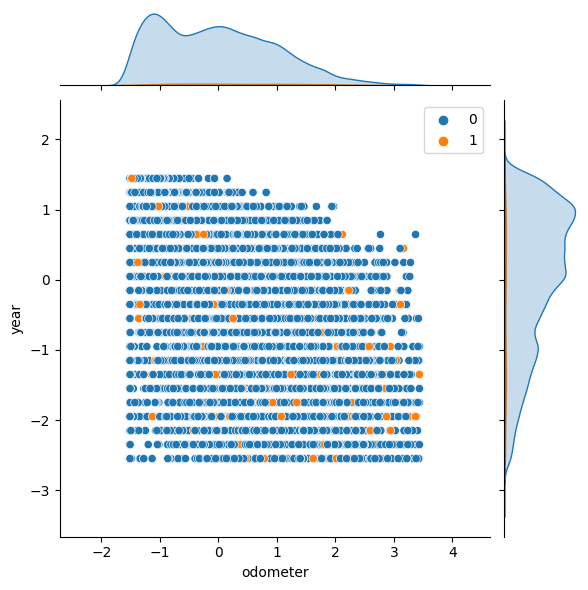

In [40]:
valDataFrame = pd.DataFrame(X_val_transformed.copy())
valDataFrame.columns = X_val.columns
sns.jointplot(valDataFrame, x = 'odometer', y = 'year', 
                hue = kmeans_cluster.predict(valDataFrame),
                kind = 'scatter')

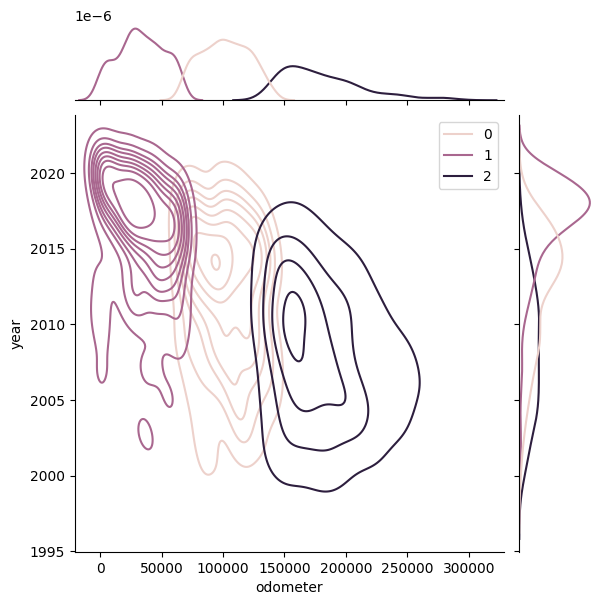

In [10]:
kmeans_cluster = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X_train[['odometer', 'year']])
valDataFrame = pd.DataFrame(X_val[['odometer', 'year']].copy())
valDataFrame.columns = ['odometer', 'year']
valdfPredict = kmeans_cluster.predict(valDataFrame.iloc[:1000])
# sns.kdeplot(valDataFrame, x = 'odometer', y = 'year', 
#                 hue = kmeans_cluster.predict(valDataFrame))
sns.jointplot(valDataFrame.iloc[:1000], x = 'odometer', y = 'year', 
                hue = valdfPredict, kind = 'kde')

In [23]:
# kmeans_cluster = OPTICS(min_samples=0.1, max_eps=10000).fit(X_train[['odometer', 'year']].iloc[:1000])
#0.6s

In [24]:
# kmeans_cluster = OPTICS(min_samples=0.1, max_eps=10000).fit(X_train[['odometer', 'year']].iloc[:10000])
#6.5s

In [25]:
# kmeans_cluster = OPTICS(min_samples=0.1, max_eps=10000).fit(X_train[['odometer', 'year']].iloc[:100000])
#5m10s

[-1  0  1 ... -1  0  1]


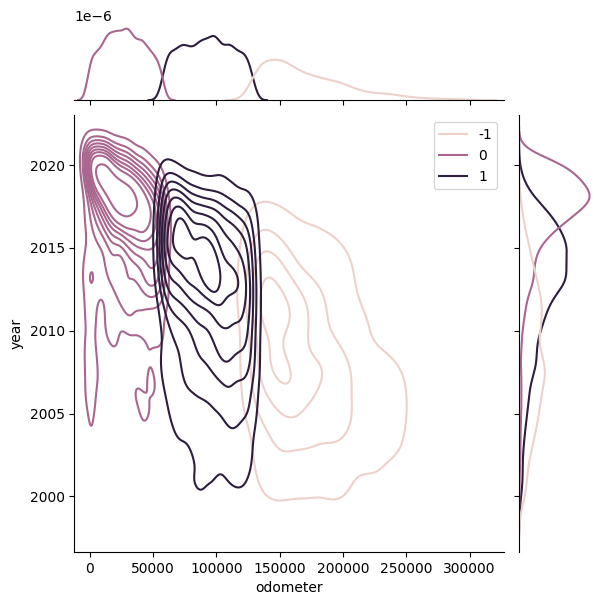

In [26]:
valDataFrame = pd.DataFrame(X_val[['odometer', 'year']].copy())
valDataFrame.columns = ['odometer', 'year']
valdfPredict = kmeans_cluster.fit_predict(valDataFrame.iloc[:10000])
print(valdfPredict.iloc[:10])
# sns.kdeplot(valDataFrame, x = 'odometer', y = 'year', 
#                 hue = kmeans_cluster.predict(valDataFrame))
sns.jointplot(valDataFrame.iloc[:10000], x = 'odometer', y = 'year', 
                hue = valdfPredict, kind = 'kde')

In [28]:
kmeans_cluster_full = OPTICS(min_samples=0.1, max_eps=10000).fit(X_train.iloc[:10000])

[-1  0  0  0  0 -1 -1 -1  0  0]
[[  1 689]]
{'algorithm': 'auto', 'cluster_method': 'xi', 'eps': None, 'leaf_size': 30, 'max_eps': 10000, 'memory': None, 'metric': 'minkowski', 'metric_params': None, 'min_cluster_size': None, 'min_samples': 0.1, 'n_jobs': None, 'p': 2, 'predecessor_correction': True, 'xi': 0.05}


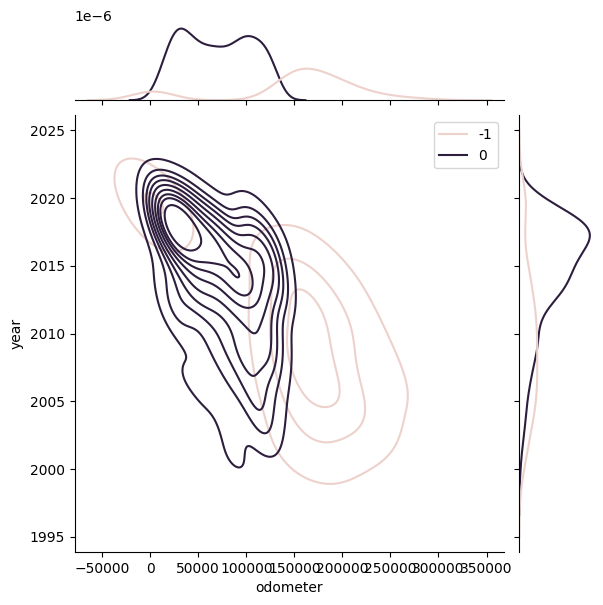

In [34]:
valDataFrame_full = pd.DataFrame(X_val.copy())
valDataFrame_full.columns = X_val.columns
valdfPredict = kmeans_cluster_full.fit_predict(valDataFrame_full[:1000])
print(valdfPredict[:10])
print(kmeans_cluster_full.cluster_hierarchy_)
print(kmeans_cluster_full.get_params())
# sns.kdeplot(valDataFrame, x = 'odometer', y = 'year', 
#                 hue = kmeans_cluster.predict(valDataFrame))
sns.jointplot(valDataFrame_full[:1000], x = 'odometer', y = 'year', 
                hue = valdfPredict, kind = 'kde')